# Libraries

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline

# Data

In [10]:
returns = (
  pd.read_csv(
    '../data/Portfolios_Formed_on_ME_monthly_EW.csv',
    na_values = -99.99,
    index_col = 0
  )
  [['Lo 10', 'Hi 10']]
  .apply(lambda col: col / 100)
)
returns.columns = ['small_cap', 'large_cap']
returns.head()

,small_cap,large_cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


`small_cap` is the 'Lo 10' portfolio — the bottom 10% of stocks by market cap.

`high_cap` is the 'Hi 10' portfolio — the top 10% of stocks by market cap.

Returns are calculated as equally weighted return of all stocks in the baskets for a given month.

# Analysis

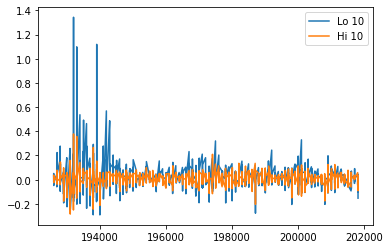

In [9]:
returns.plot.line();

Annualized volatility is the product of the volatility and the square root of number of periods $p$ for a given year (e.g. months, trading days).

$$\sigma_{p} = \sigma_{R} \sqrt{p}$$

Since these returns are monthly, to calculate the annualized volatility, the period is 12.

In [12]:
annualized_vol = returns.std() * np.sqrt(12)
annualized_vol

small_cap    0.368193
large_cap    0.186716
dtype: float64

In [19]:
returns.sum() / len(returns)

small_cap    0.017598
large_cap    0.008870
dtype: float64

In [16]:
# Calculate total return over all months
returns_per_month = (returns + 1).prod()

# Calculate return per month
n_months = len(returns)
returns_per_month = returns_per_month**(1 / n_months) - 1
returns_per_month

small_cap    0.012986
large_cap    0.007423
dtype: float64

In [26]:
returns_per_month

small_cap    0.012986
large_cap    0.007423
dtype: float64

# Annualization

In [21]:
monthly_return = .01
(1 + monthly_return)**12 - 1

0.12682503013196977

In [24]:
quarterly_return = .04
(1 + quarterly_return)**4 - 1

0.1698585600000002

In [25]:
daily_return = .0001
(1 + daily_return)**252 - 1

0.025518911987694626